In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import regex as re

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('car_dataset.csv')

In [3]:
df.head()

,Unnamed: 0,Engine,Brand Name,Location,Driven,Insuarnce,Owner,Transmission,Milege,Fuel Type,Max Power(In bhp),Price
0,0,1196 CC,2016 Maruti Eeco,Ahmedabad,"45,347 Kms",Third Party insurance,1st Owner,Manual,15.37 kmpl,Petrol,73bhp,"₹ 3,80,500"
1,1,1498 CC,2019 Volkswagen Vento,Ahmedabad,"97,922 Kms",Third Party insurance,1st Owner,Manual,22.27 kmpl,Diesel,108.6bhp,"₹ 7,11,000"
2,2,1248 CC,2013 Maruti Swift Dzire,Ahmedabad,"80,084 Kms",Third Party insurance,1st Owner,Manual,23.4 kmpl,Diesel,74bhp,"₹ 3,40,500"
3,3,998 CC,2017 Maruti Wagon R,Ahmedabad,"41,174 Kms",Third Party insurance,1st Owner,Automatic,20.51 kmpl,Petrol,67bhp,"₹ 4,30,000"
4,4,1196 CC,2017 Maruti Eeco,Ahmedabad,"88,362 Kms",Third Party insurance,1st Owner,Manual,16.11 kmpl,Petrol,72.42bhp,"₹ 3,97,000"


In [4]:
df.shape

(7193, 12)

In [5]:
df.nunique()

Unnamed: 0           7193
Engine                133
Brand Name           3132
Location                8
Driven               3638
Insuarnce              10
Owner                   8
Transmission           42
Milege                447
Fuel Type               5
Max Power(In bhp)     500
Price                1897
dtype: int64

In [6]:
df.rename(columns={"Insuarnce":"Insurance"},inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7193 entries, 0 to 7192
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         7193 non-null   int64 
 1   Engine             7184 non-null   object
 2   Brand Name         7185 non-null   object
 3   Location           7193 non-null   object
 4   Driven             7185 non-null   object
 5   Insurance          7183 non-null   object
 6   Owner              7185 non-null   object
 7   Transmission       7185 non-null   object
 8   Milege             7185 non-null   object
 9   Fuel Type          7176 non-null   object
 10  Max Power(In bhp)  7164 non-null   object
 11  Price              7176 non-null   object
dtypes: int64(1), object(11)
memory usage: 674.5+ KB


In [8]:
df.dropna(axis=0,inplace=True)

### Data Preparation

In [9]:
# Finding Out the garbage value
for i in df['Engine']:
    if "CC" not in i:
        print(i)
        

17 x 7.5J
103.25bhp
5
6
6
6
5
17 x 7.5J
17 x 7.5J
8
17 x 7.5J
17 x 7.5J
17 x 7.5J


In [10]:
# Finding Out the garbage value
for i in df['Price']:
    if " Cr*" in i:
        index = np.where(df['Price']==i)
        print(index)

(array([1109], dtype=int64),)
(array([1210], dtype=int64),)
(array([3553], dtype=int64),)
(array([3858], dtype=int64),)
(array([6568, 6936], dtype=int64),)
(array([6568, 6936], dtype=int64),)


In [11]:
# NOw removing that garbage values
for i in ['17 x 7.5J','5','6','8','103.25bhp']:
    index = np.where(df['Engine']==i)
    df.drop(df.index[index],inplace=True)

In [12]:
df['Engine'] = df['Engine'].str.split().str[0]
df['Engine']=df['Engine'].astype('int')

df["Make Year"] = df['Brand Name'].str.split().str[0]
df['Make Year']=df['Make Year'].astype('int')

df['Model'] = df['Brand Name'].str.split(" ").str[2]

df['Variant'] = df['Brand Name'].str.split(" ").str[4:]

df['Manufacturer Name'] = df['Brand Name'].str.split().str[1]

df['Driven'] = df['Driven'].str.split().str[0]
df['Milege'] = df['Milege'].str.split().str[0]

In [13]:
price = list(df['Price'])
for i in range(0,len(price)):
    if "Cr*" in str(price[i]):
        price[i]= price[i].replace('Cr*',"").replace(" ","")
        price[i]= (float(price[i])*10000000)

In [14]:
for i in range(0,len(price)):
    if "Lakh*" in str(price[i]):
        price[i]=price[i].replace('Lakh*',"").replace(" ","")
        price[i] = pd.to_numeric(price[i],errors='coerce')
        price[i] = price[i]*100000

In [15]:
for i in range(0,len(price)):
    price[i]= str(price[i]).replace("₹ ","").replace(",","").replace("*","")

df['Price'] = price
df['Price'] = pd.to_numeric(df['Price'],errors='coerce')

In [16]:
variant = list(df['Variant'])
for i in range(0,len(variant)):
    if variant[i]==[]:
        variant[i] = np.nan
    else:
        variant[i] = ",".join(variant[i])


df['Variant']=variant

In [17]:
# Dropping all the garbage values
unmatch = []
for i in df['Max Power(In bhp)']:
    if "bhp" not in i:
        if i not in unmatch:
            unmatch.append(i)

for i in unmatch:
    index = np.where(df['Max Power(In bhp)']==i)
    df.drop(df.index[index],inplace=True)

In [18]:
df['Max Power(In bhp)'] = df['Max Power(In bhp)'].str.replace("bhp","").replace(" ","")

In [19]:
df['Driven'] = df['Driven'].str.replace(",","")
df['Variant'] = df['Variant'].str.replace(","," ")

In [20]:
df.drop(columns='Brand Name',axis=1,inplace=True)

## EDA

In [21]:
df.shape

(7095, 15)

The column has 7045 rows and 15 column and this is the intial dataset size for me to data cleaning.

In [22]:
df.isna().sum()

Unnamed: 0              0
Engine                  0
Location                0
Driven                  0
Insurance               0
Owner                   0
Transmission            0
Milege                  0
Fuel Type               0
Max Power(In bhp)       0
Price                   0
Make Year               0
Model                   0
Variant              2922
Manufacturer Name       0
dtype: int64

Variant provide information like **number of doors, space present in the car, Engine size and other features** and the price of the car vary with the no. of features present in the car. But here in our dataset we have in **Variant column** we have more than 30% data missing and filling them with mode or any other method is not a good practice so i am going to drop that column.

In [23]:
df.drop("Variant",axis=1,inplace=True)

In [24]:
df.isin(['null ']).sum()

Unnamed: 0            0
Engine                0
Location              0
Driven                0
Insurance             0
Owner                 0
Transmission          0
Milege                0
Fuel Type             0
Max Power(In bhp)    50
Price                 0
Make Year             0
Model                 0
Manufacturer Name     0
dtype: int64

In [25]:
df.nunique()

Unnamed: 0           7095
Engine                124
Location                8
Driven               3552
Insurance              10
Owner                   8
Transmission           41
Milege                431
Fuel Type               5
Max Power(In bhp)     482
Price                1636
Make Year              23
Model                 210
Manufacturer Name      33
dtype: int64

In [26]:
index = np.where(df['Max Power(In bhp)']=='null ')
df.drop(df.index[index],axis=0,inplace=True)

In [27]:
df['Max Power(In bhp)'] = df['Max Power(In bhp)'].astype('float32')

In [28]:
df['Milege'] = df['Milege'].astype('float32')
df['Driven'] = df['Driven'].astype('int')

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7045 entries, 0 to 7192
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         7045 non-null   int64  
 1   Engine             7045 non-null   int32  
 2   Location           7045 non-null   object 
 3   Driven             7045 non-null   int32  
 4   Insurance          7045 non-null   object 
 5   Owner              7045 non-null   object 
 6   Transmission       7045 non-null   object 
 7   Milege             7045 non-null   float32
 8   Fuel Type          7045 non-null   object 
 9   Max Power(In bhp)  7045 non-null   float32
 10  Price              7045 non-null   float64
 11  Make Year          7045 non-null   int32  
 12  Model              7045 non-null   object 
 13  Manufacturer Name  7045 non-null   object 
dtypes: float32(2), float64(1), int32(3), int64(1), object(7)
memory usage: 688.0+ KB


In [30]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,7045.0,3593.354578,2076.815814,0.0,1797.000000,3591.000000,5392.000000,7192.0
Engine,7045.0,1408.245848,474.324649,0.0,1197.000000,1248.000000,1498.000000,5461.0
Driven,7045.0,59011.627253,43705.529241,1.0,33405.000000,55000.000000,76843.000000,1019000.0
Milege,7045.0,19.748520,4.100941,0.0,17.209999,19.870001,22.320000,36.0
Max Power(In bhp),7045.0,96.839470,40.135265,32.5,74.000000,85.000000,105.940002,641.0
Price,7045.0,718589.422569,921547.492618,30000.0,356000.000000,515000.000000,720000.000000,30800000.0
Make Year,7045.0,2014.971043,3.147295,1986.0,2013.000000,2015.000000,2017.000000,2021.0


### Univariate Analysis

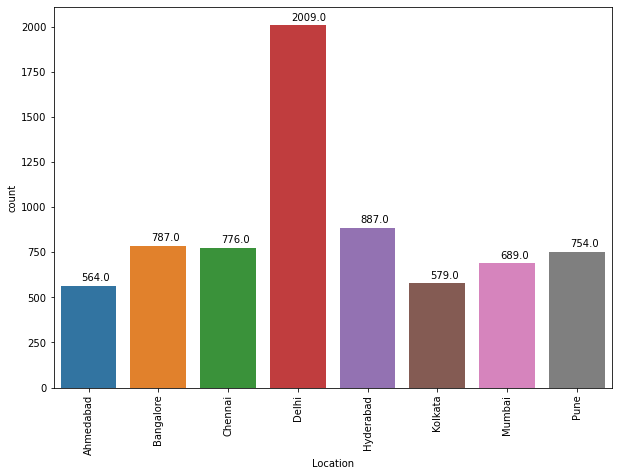

In [31]:
plt.figure(figsize=(10,7))
ax=sns.countplot('Location',data=df)
plt.xticks(rotation=90)
for p in ax.patches:
        ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()+25))
plt.show()

Here we have the data of all the popular cities. But in our dataset we have mostly Delhi and it's surrounding data.

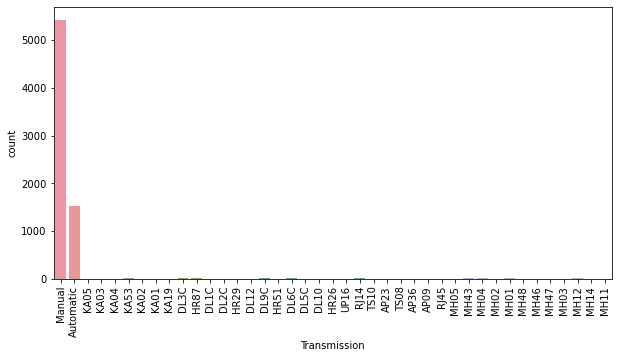

In [32]:
plt.figure(figsize=(10,5))
sns.countplot('Transmission',data=df)
plt.xticks(rotation=90)
plt.show()

There can be only two transmission either **Manual or Automatic** but here some garbage value is showing

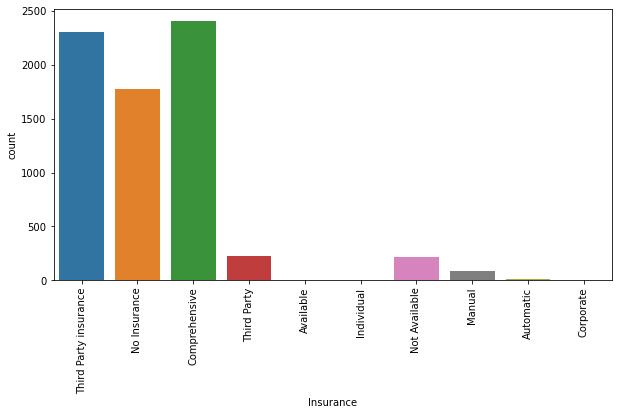

In [33]:
plt.figure(figsize=(10,5))
sns.countplot('Insurance',data=df)
plt.xticks(rotation=90)
plt.show()

There are major four type of insurance Present Third party, Comprehensive, individual and Corporate. and here some garbage values present like Manual and Automatic

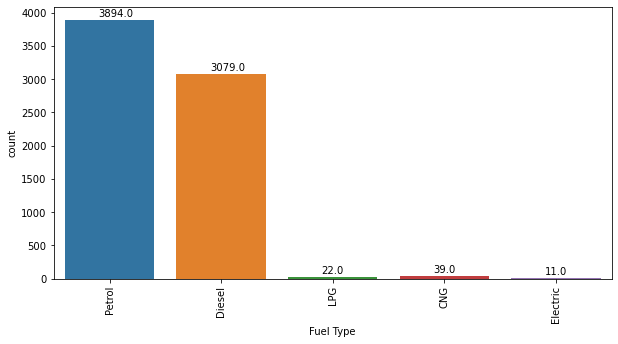

In [34]:
plt.figure(figsize=(10,5))
ax=sns.countplot('Fuel Type',data=df)
plt.xticks(rotation=90)
for p in ax.patches:
        ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()+50))
plt.show()

Mainly car we have here, use Petrol and Diesel as the main source of Energy.

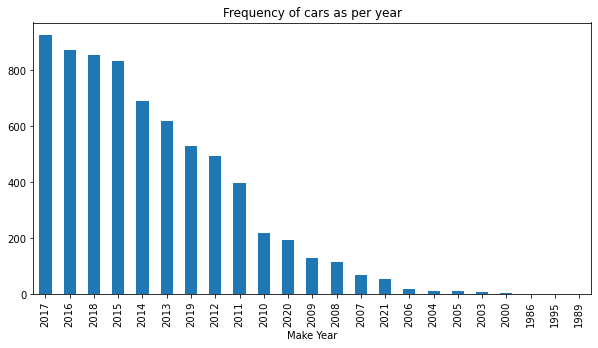

In [35]:
df['Make Year'].value_counts().plot.bar(figsize=(10,5))
plt.xlabel("Make Year")
plt.title("Frequency of cars as per year")
plt.show()

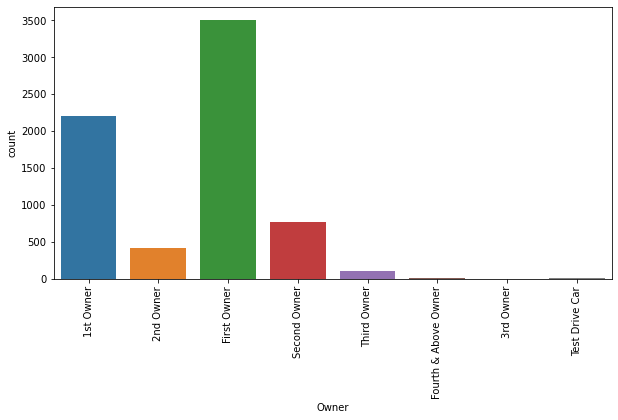

In [36]:
plt.figure(figsize=(10,5))
sns.countplot(df['Owner'])
plt.xticks(rotation=90)
plt.show()

There is one more category Which Test Drive car that means no one is the Owner of that car it is used by multiple people to test the car

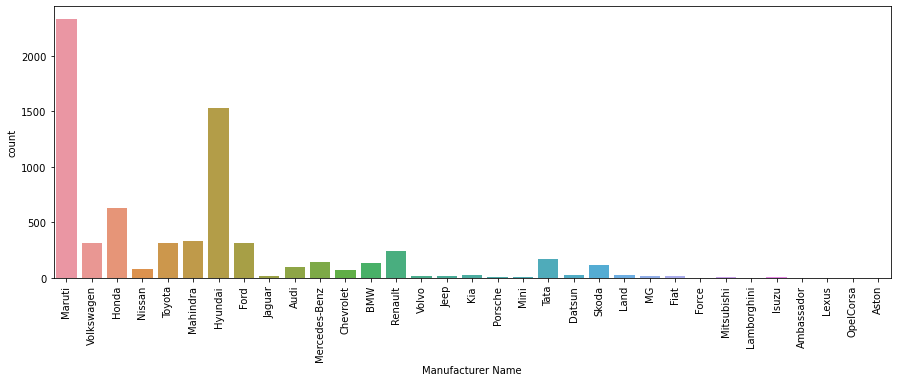

In [37]:
plt.figure(figsize=(15,5))
sns.countplot(df['Manufacturer Name'])
plt.xticks(rotation=90)
plt.show()

In [38]:
num = df.select_dtypes(exclude='object')

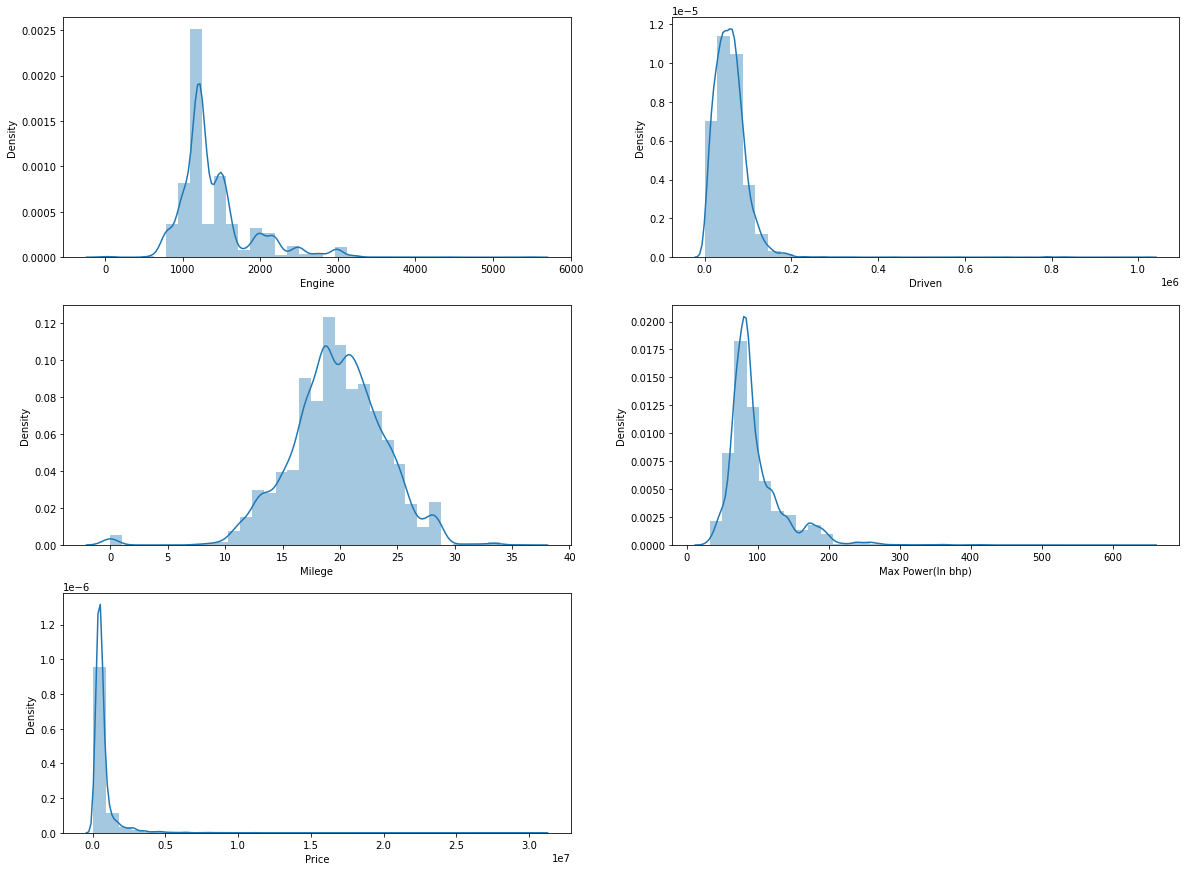

In [39]:
plotnumber=1
plt.figure(figsize=(20,15))
for i in num.drop(columns=["Unnamed: 0","Make Year"],axis=1):
    if plotnumber < 6:
        plt.subplot(3,2,plotnumber)
        sns.distplot(num[i],bins=35,kde=True)
        plotnumber+=1
plt.show()

All the numerical  seems to be skewed and having Outliers.

### Bivariate Analysis

In [40]:
cat = df.select_dtypes(exclude=np.number)

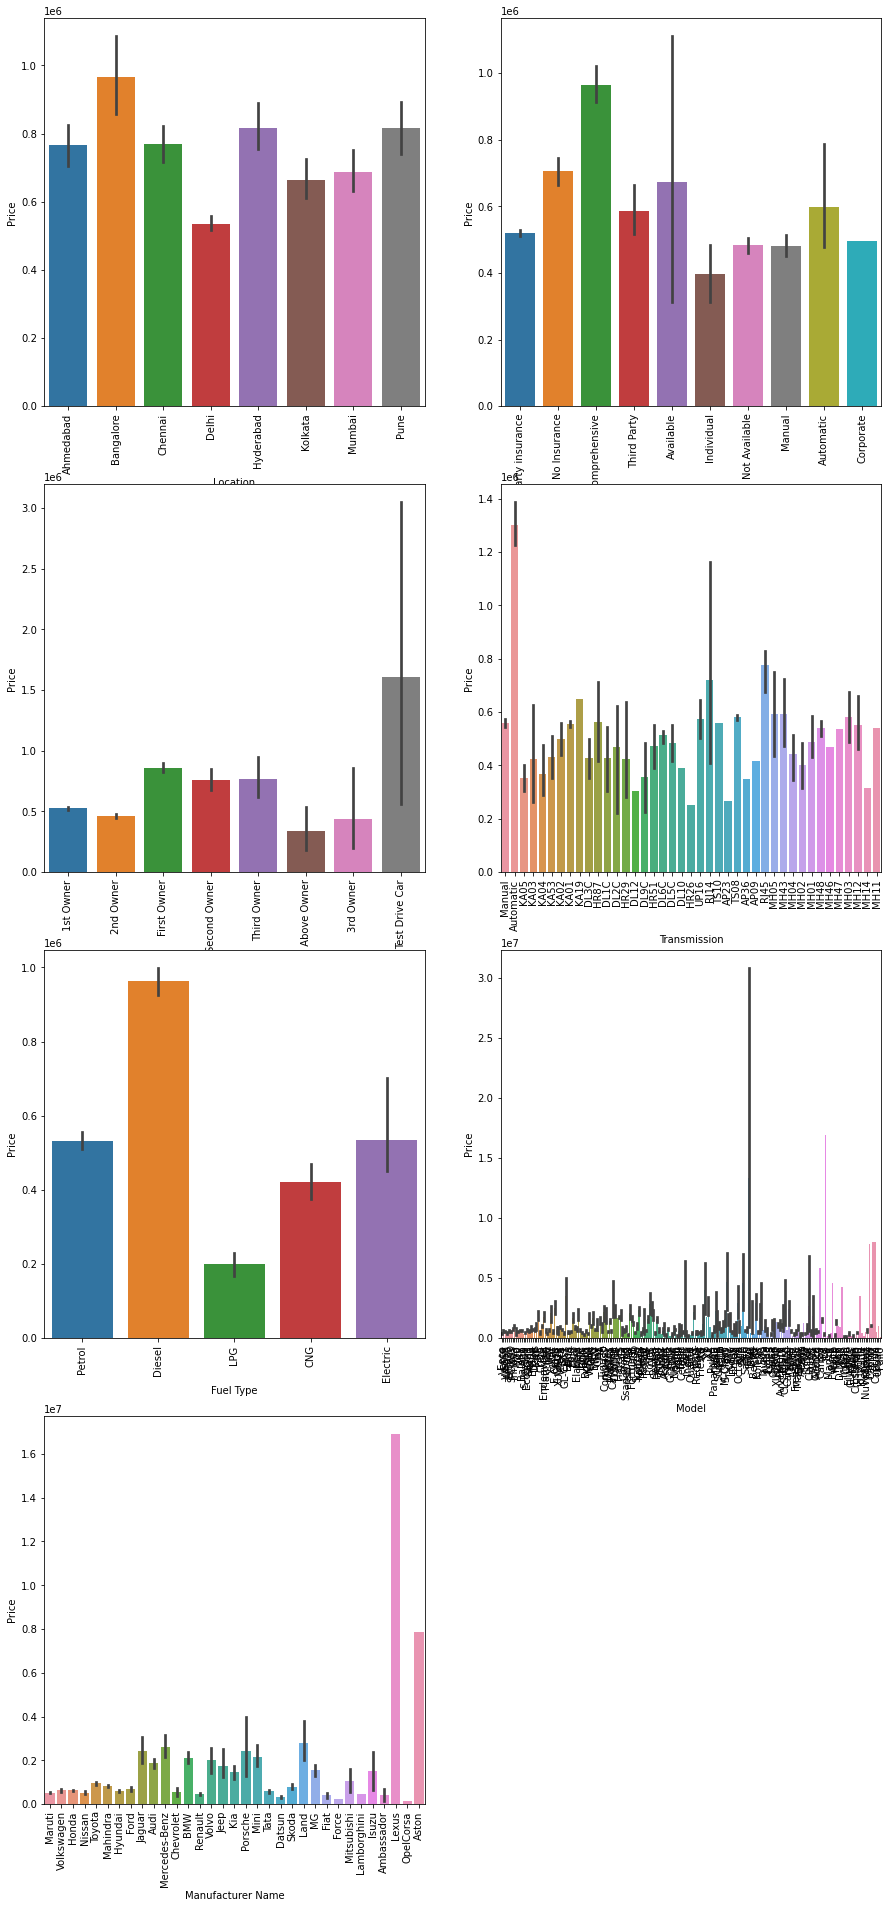

In [41]:
plotnumber=1
plt.figure(figsize=(15,50))
for i in cat:
    if plotnumber < 12:
        plt.subplot(6,2,plotnumber)
        sns.barplot(cat[i],df['Price'])
        plt.xticks(rotation=90)
        plotnumber+=1
plt.show()

* Used car price is high in Bangalore. whereas Delhi car has lowest Price as compare to other location.
* The car which have comprehensive insurance has a slightly higher price than other car which have third party or other type of insurance.
* The Diesel Model of a car have high price comparatively any other car which use different fuel type.
* The Lexus and auton brand car have slighlty high price as compare to other brand and Maruti and Force comes under Budget cars.


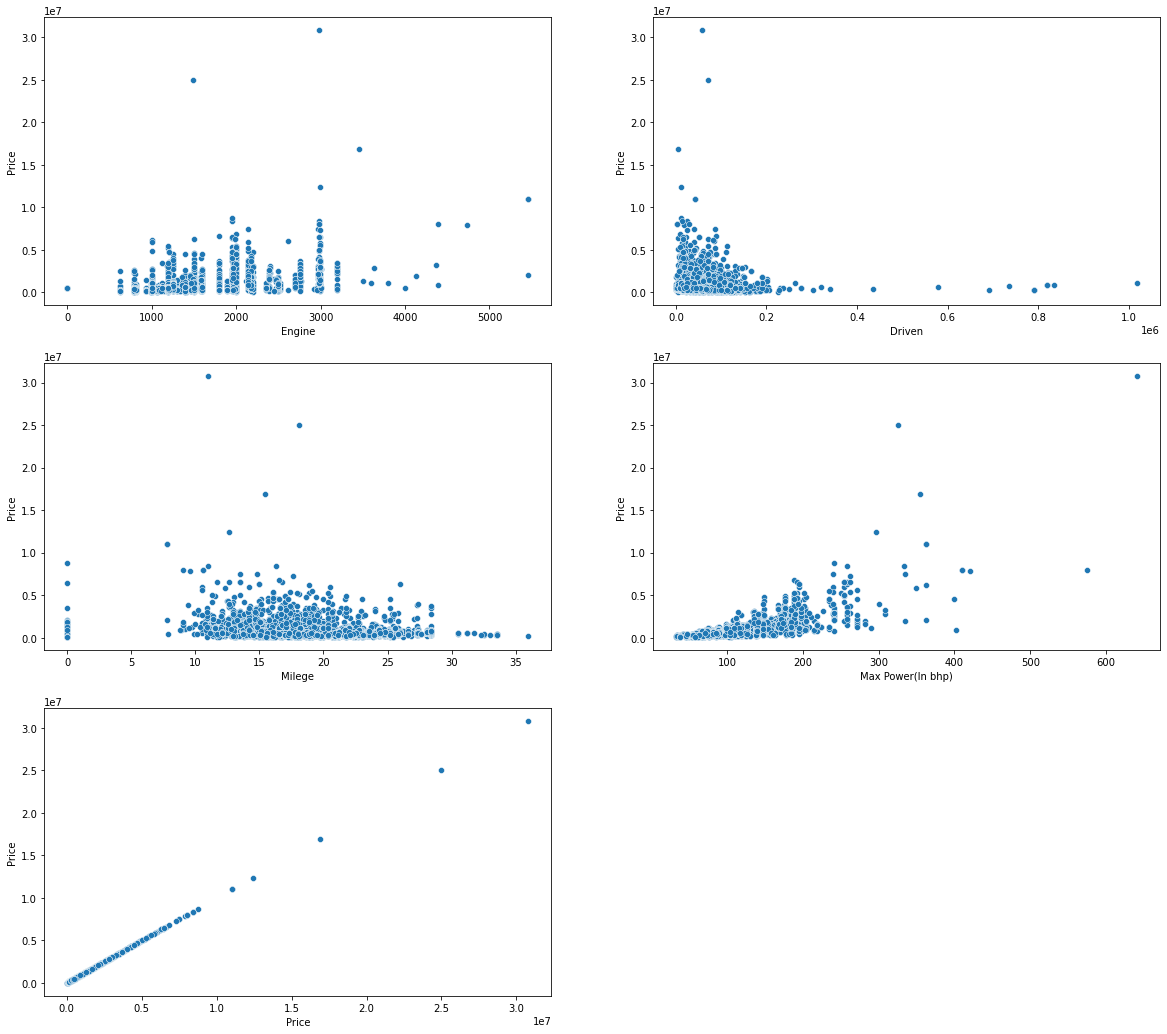

In [42]:
plotnumber=1
plt.figure(figsize=(20,18))
for i in num.drop(columns=["Unnamed: 0"],axis=1):
    if plotnumber < 6:
        plt.subplot(3,2,plotnumber)
        sns.scatterplot(num[i],df['Price'])
        plotnumber+=1
plt.show()

It seems that all the columns have Outliers and none of the columns is showing any linear relation with the target Variable.

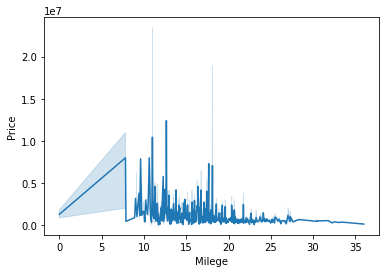

In [43]:
sns.lineplot(df['Milege'],df['Price'])
plt.show()

Milege doesn't seems to have Any linear relation with the Price columns

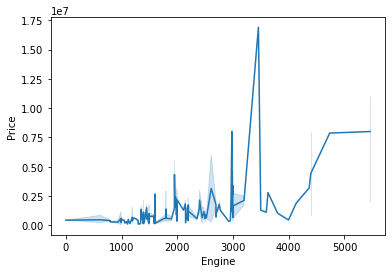

In [44]:
sns.lineplot(df['Engine'],df['Price'])
plt.show()

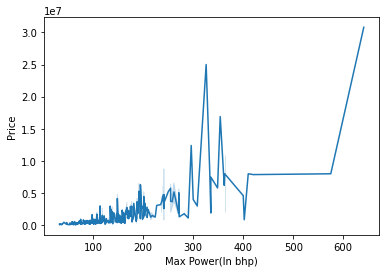

In [45]:
sns.lineplot(df['Max Power(In bhp)'],df['Price'])
plt.show()

#### Before moving Further i need to encode the columns

In [46]:
df['Insurance'].unique()

array(['Third Party insurance', 'No Insurance', 'Comprehensive',
       'Third Party', 'Available', 'Individual', 'Not Available',
       'Manual', 'Automatic', 'Corporate'], dtype=object)

I am considering **Available** as Third party insurance

In [47]:
for i in ["Automatic","Manual"]:
    index=np.where(df['Insurance']==i)
    df.drop(df.index[index],axis=0,inplace=True)

In [48]:
df['Insurance'] = df['Insurance'].replace("Third Party insurance",3).replace("Third Party",3).replace("Available",3)

In [49]:
df['Insurance'] = df['Insurance'].replace("No Insurance",0).replace("Not Available",0)
df['Insurance'] = df['Insurance'].replace("Comprehensive",1).replace("Comprehensive",1)
df['Insurance'] = df['Insurance'].replace("Individual",2)
df['Insurance'] = df['Insurance'].replace("Corporate",4)

In [50]:
df['Owner'] = df['Owner'].replace("1st Owner",1).replace("First Owner",1)
df['Owner'] = df['Owner'].replace("2nd Owner",2).replace("Second Owner",2)
df['Owner'] = df['Owner'].replace("Third Owner",3).replace("3rd Owner",3)
df['Owner'] = df['Owner'].replace("Fourth & Above Owner",4)
df['Owner'] = df['Owner'].replace("Test Drive Car",0)

In [51]:
df['Transmission']=np.where(df["Transmission"]=="Manual",0,1)

In [52]:
df['Fuel Type'].unique()

array(['Petrol', 'Diesel', 'LPG', 'CNG', 'Electric'], dtype=object)

In [53]:
df['Fuel Type'] = df['Fuel Type'].replace("Diesel",1)
df['Fuel Type'] = df['Fuel Type'].replace("LPG",2)
df['Fuel Type'] = df['Fuel Type'].replace("CNG",3)
df['Fuel Type'] = df['Fuel Type'].replace("Electric",4)
df['Fuel Type'] = df['Fuel Type'].replace("Petrol",0)

In [54]:
from sklearn.preprocessing import OrdinalEncoder
# Separating categorical and numerical columns
cat_df = df.select_dtypes(include='object')

In [55]:
num_df = df.select_dtypes(include=np.number)

In [56]:
encoding = OrdinalEncoder()
for i in cat_df:
    cat_df[[i]] = encoding.fit_transform(cat_df[[i]])

In [57]:
cat_df = cat_df.astype('float')

In [58]:
final_df = pd.concat([cat_df,num_df],axis=1)

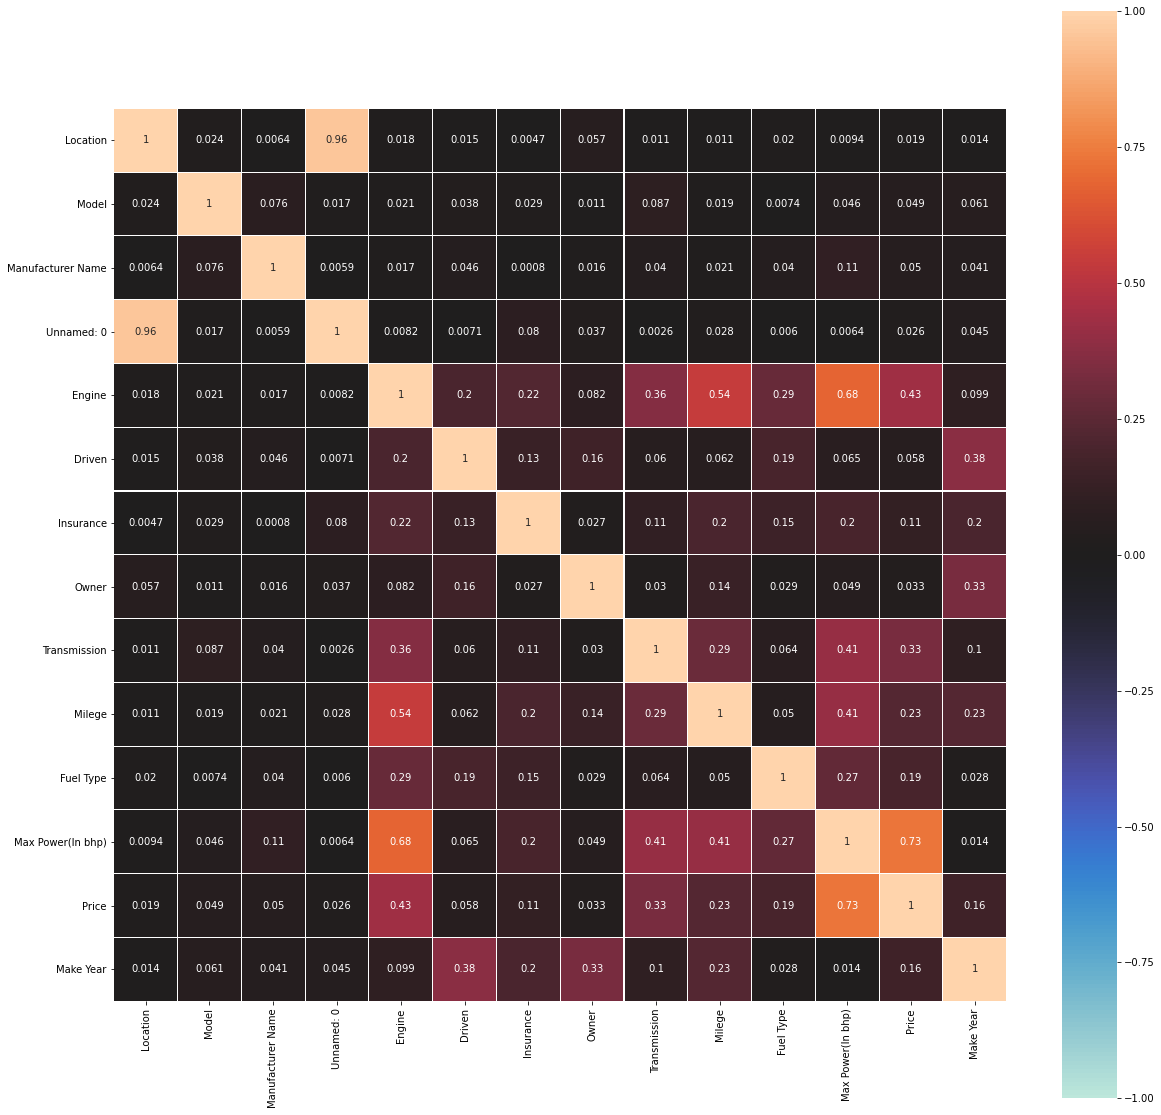

In [59]:
plt.figure(figsize=(20,20))
df_corr = final_df.corr().abs()
sns.heatmap(df_corr,vmin=-1,vmax=1,center=0,fmt='.2g',annot=True,linewidths=.1,square=True)
plt.show()

* From above it is seems that Max Power(In bhp) and price have good correlation
* Unnamed: 0 and Location shows multicolinearity

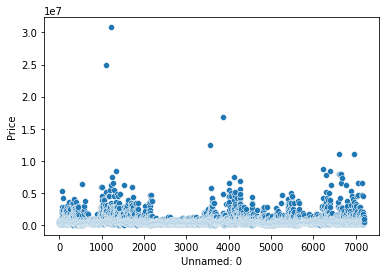

In [60]:
sns.scatterplot(df['Unnamed: 0'],df['Price'])
plt.show()

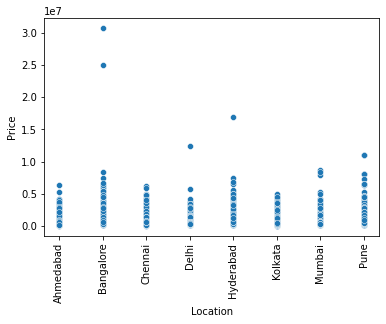

In [61]:
sns.scatterplot(df['Location'],df['Price'])
plt.xticks(rotation=90)
plt.show()

It may be showing Multicolinearity but it didn't Location and Unnamed: 0 does not have same relation with the target columns

### Data Cleanings

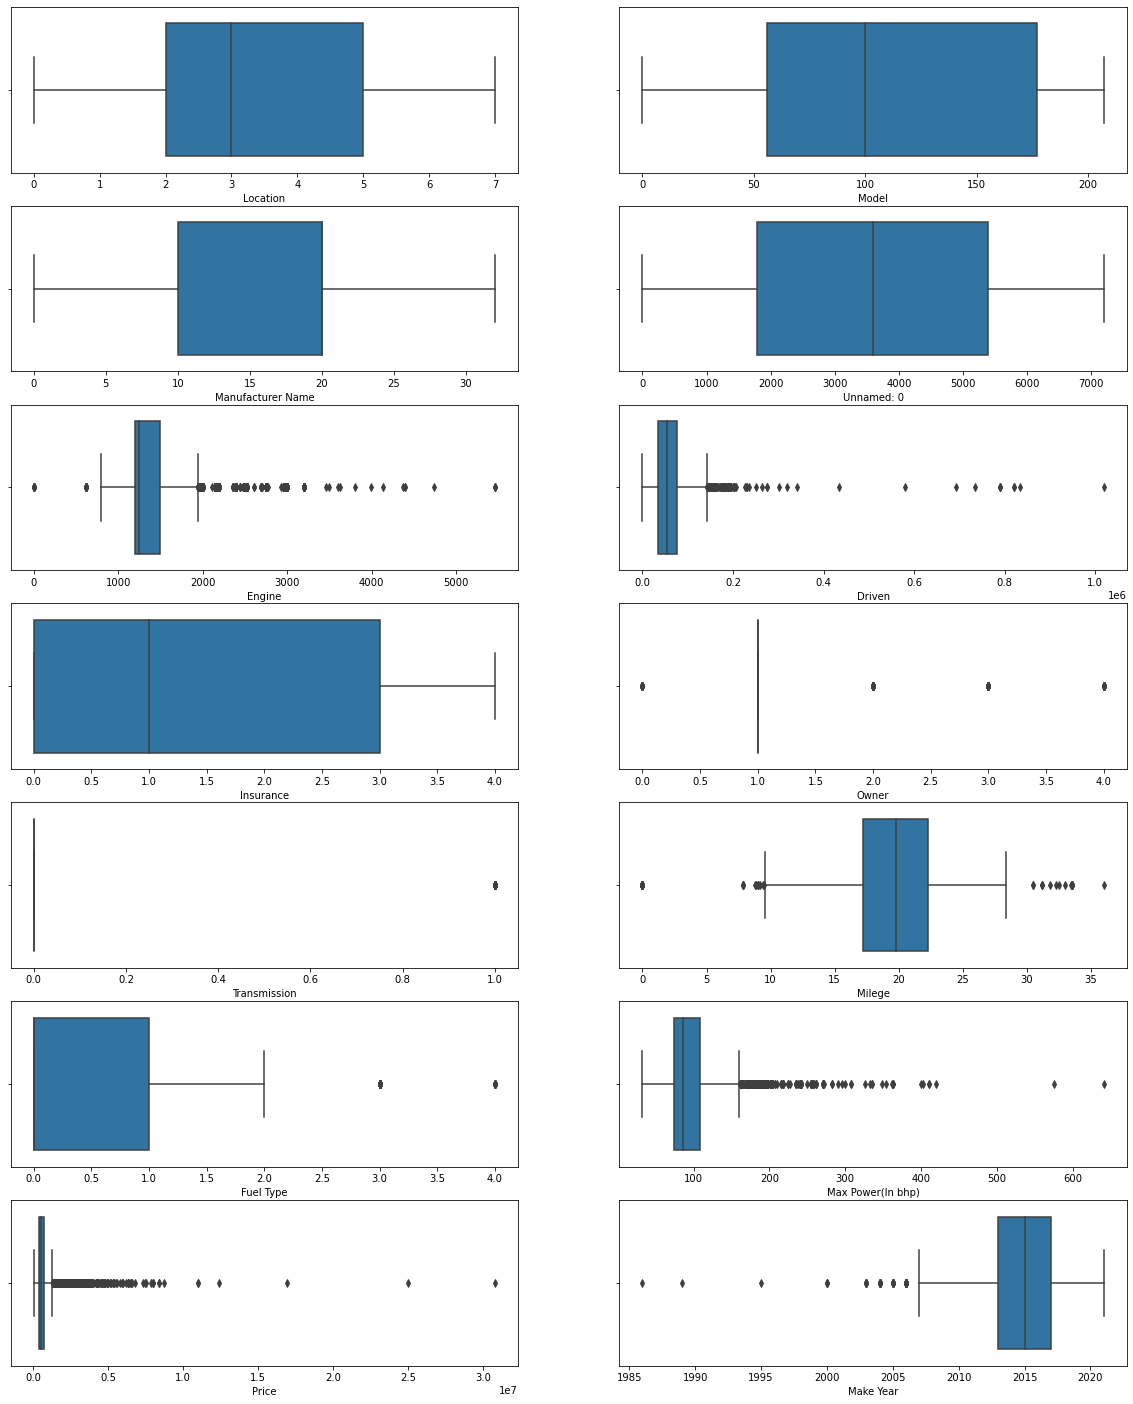

In [62]:
plotnumber=1
plt.figure(figsize=(20,25))
for i in final_df:
    if plotnumber < 15:
        plt.subplot(7,2,plotnumber)
        sns.boxplot(final_df[i])
        plotnumber+=1
plt.show()

* Driven, Max Power(In bhp), Milege and Engine has Outliers
* price columns also has outlier but it is our target column as well.

In [63]:
q1 = final_df.quantile(0.25)
q3 = final_df.quantile(0.75)
iqr = q3-q1

#### I am using Interquartile method to remove Outliers from the mileage columns because from above boxplot we can see that milege columns also contain "0" and we all ware that milege of any car cannot be zero. Therefore i am using Interquartile method to drop upper and lower outliers of mileage using Interquartile method. and for remaining i am going to use z score to avoid the data loss and we all aware that it is possible that few columns have outliers and it is also kind of important for our models to understand the exceptional cases.

In [64]:
lower = q1['Milege']-(1.5*iqr['Milege'])
index = np.where(final_df['Milege']<lower)
final_df.drop(final_df.index[index],inplace=True)

In [65]:
upper = q3['Milege']+(1.5*iqr['Milege'])
index = np.where(final_df['Milege']>upper)
final_df.drop(final_df.index[index],inplace=True)

In [66]:
final_df.shape

(6867, 14)

If i further try to use quantile method to take care Outliers than the loss will be greater than 10%. Therefore i am going to use Zscore method.

In [67]:
from scipy.stats import zscore

In [68]:
zscr = zscore(final_df[['Engine','Driven','Max Power(In bhp)']])
abs_zscr = np.abs(zscr)
filtered_entries = ((abs_zscr < 2.7 )&(abs_zscr > -2.7 )).all(axis=1)
new_df = final_df[filtered_entries]

##### By applying z score at 2.7 i tried to remove the Outliers as much as possible so that data become normally distributed and we know that 99.9% data lies between -3 to +3. But here i have tried different threshold value to remove Outlier and reduce the skewness from the data as much as possible

In [69]:
new_df.shape

(6551, 14)

#### The size of the New dataset which we going to use ahead is above

In [70]:
new_df.skew()

Location             0.197536
Model               -0.043693
Manufacturer Name    0.168663
Unnamed: 0           0.002894
Engine               1.180371
Driven               0.615953
Insurance            0.186719
Owner                2.203492
Transmission         1.560312
Milege               0.068993
Fuel Type            0.643225
Max Power(In bhp)    1.347624
Price                4.100998
Make Year           -0.834065
dtype: float64

In [71]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer()

In [72]:
new_df[["Driven","Engine","Max Power(In bhp)"]] = pt.fit_transform(new_df[["Driven","Engine","Max Power(In bhp)"]])

In [73]:
new_df.skew()

Location             0.197536
Model               -0.043693
Manufacturer Name    0.168663
Unnamed: 0           0.002894
Engine              -0.013366
Driven              -0.057288
Insurance            0.186719
Owner                2.203492
Transmission         1.560312
Milege               0.068993
Fuel Type            0.643225
Max Power(In bhp)   -0.022128
Price                4.100998
Make Year           -0.834065
dtype: float64

**Skewness od all the continues columns is in tolerable limit and those columns which have skewness they are either categorical or target column**

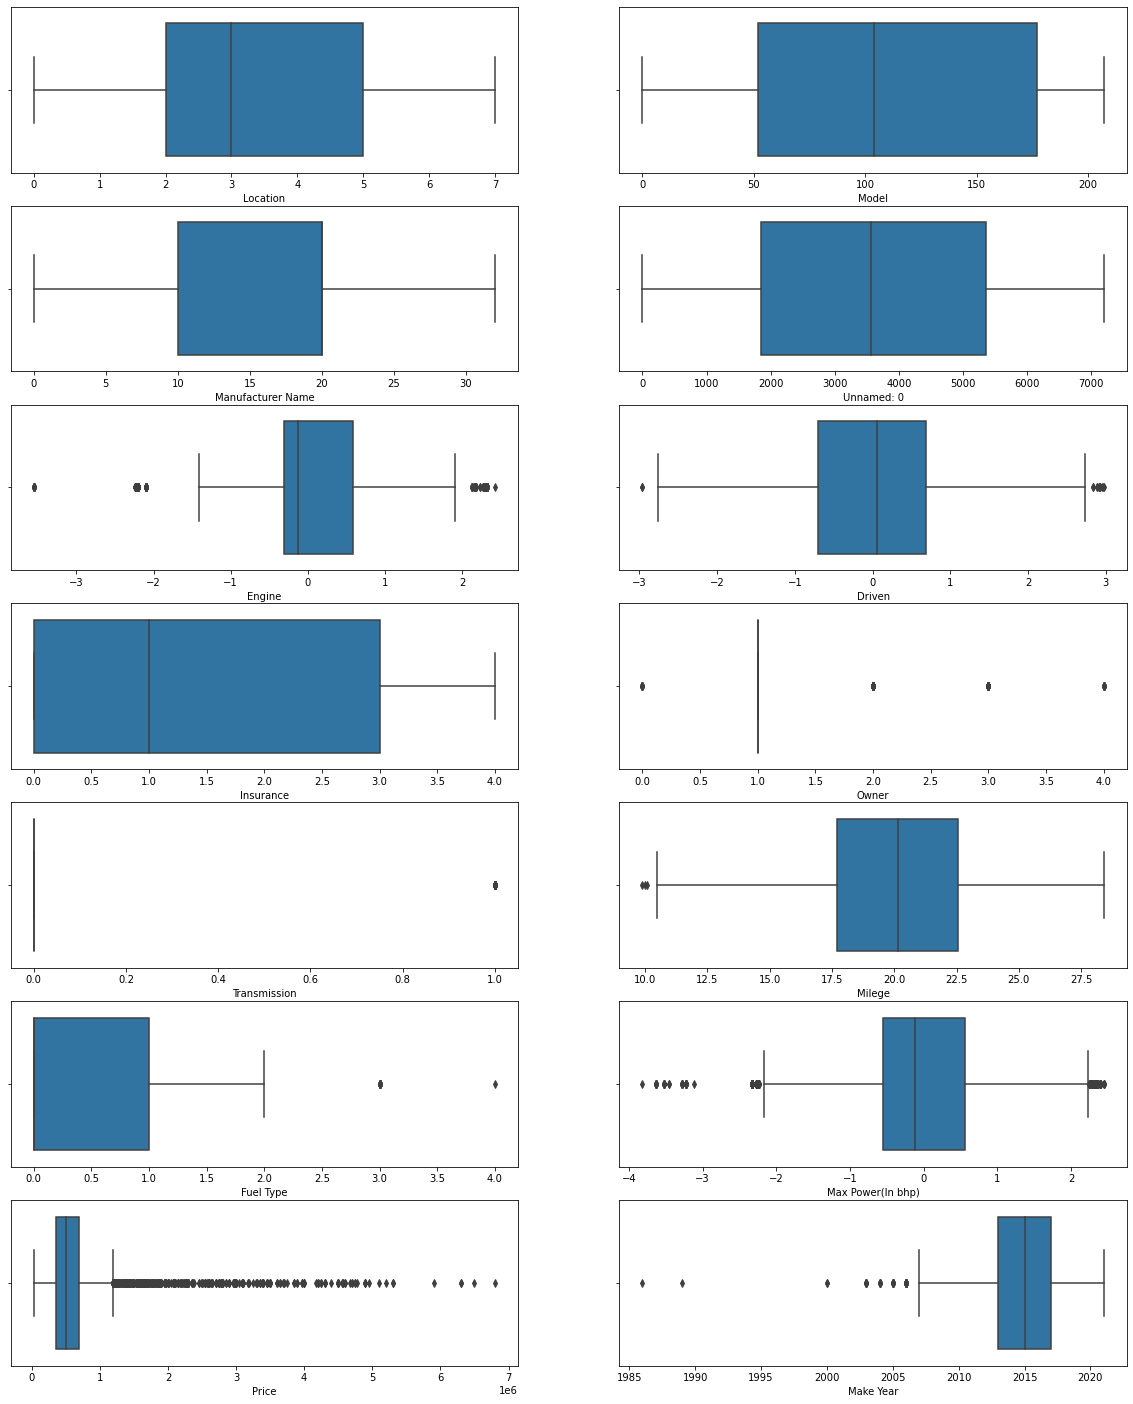

In [74]:
plotnumber=1
plt.figure(figsize=(20,25))
for i in new_df:
    if plotnumber < 15:
        plt.subplot(7,2,plotnumber)
        sns.boxplot(new_df[i])
        plotnumber+=1
plt.show()

#### Outlier is taken cared as much as possible. 

In [75]:
x = new_df.drop(columns=["Price","Unnamed: 0"],axis=1)
y = new_df["Price"]

In [76]:
from sklearn.preprocessing import StandardScaler,PowerTransformer
from sklearn.model_selection import cross_val_score,train_test_split,LeaveOneOut,GridSearchCV,RandomizedSearchCV,KFold
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression,Lasso,Ridge,LassoCV,RidgeCV
from sklearn.ensemble import GradientBoostingRegressor,AdaBoostRegressor,BaggingRegressor,RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.decomposition import PCA
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [77]:
scale = StandardScaler()
x_scaled = scale.fit_transform(x)

In [78]:
max_accu = []
for i in range(1,300):
    x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.30,random_state=i)
    mod = XGBRegressor()
    mod.fit(x_train,y_train)
    y_pred = mod.predict(x_test)
    accu_score = r2_score(y_test,y_pred)
    max_accu.append(accu_score)
max_value = max(max_accu)
print("Max accuracy is:",max_value,"Random state is :",max_accu.index(max_value))

Max accuracy is: 0.8695916388279411 Random state is : 266


In [79]:
kf = KFold(n_splits=5,shuffle=True,random_state=266)

In [80]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.25,random_state=266)

### BaggingRegressor

In [89]:
bag_reg = BaggingRegressor()
bag_reg.fit(x_train,y_train)

BaggingRegressor()

In [90]:
y_pred = bag_reg.predict(x_test)

In [91]:
diff=[]
r2score=[]
cross=[]
cv=cross_val_score(bag_reg,x_scaled,y,cv=kf).mean()
print(" R2 score :",r2_score(y_test,y_pred),"\n","="*60,"\n","cross Validation score :",
      cv)

 R2 score : 0.8419870425168285 
 cross Validation score : 0.8037695503803018


In [92]:
r = r2_score(y_test,y_pred)
r2score.append(r)
cross.append(cv)
diff.append(r-cv)

### RandomForestRegressor

In [93]:
rf = RandomForestRegressor()
rf.fit(x_train,y_train)

RandomForestRegressor()

In [94]:
y_pred = rf.predict(x_test)

In [95]:
cv=cross_val_score(rf,x_scaled,y,cv=kf).mean()
print(" R2 score :",r2_score(y_test,y_pred),"\n","="*60,"\n","cross Validation score :",
      cv)

 R2 score : 0.8492563825605572 
 cross Validation score : 0.8189959697341509


In [96]:
r = r2_score(y_test,y_pred)
r2score.append(r)
cross.append(cv)
diff.append(r-cv)

### AdaBoostRegressor

In [97]:
ada = AdaBoostRegressor()
ada.fit(x_train,y_train)

AdaBoostRegressor()

In [98]:
y_pred = ada.predict(x_test)

In [99]:
cv=cross_val_score(ada,x_scaled,y,cv=kf).mean()
print(" R2 score :",r2_score(y_test,y_pred),"\n","="*60,"\n","cross Validation score :",
      cv)

 R2 score : 0.720747653699487 
 cross Validation score : 0.5714046504074421


In [100]:
r = r2_score(y_test,y_pred)
r2score.append(r)
cross.append(cv)
diff.append(r-cv)

### XGBRegressor

In [101]:
xgb = XGBRegressor()
xgb.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [102]:
y_pred = xgb.predict(x_test)

In [103]:
cv=cross_val_score(xgb,x_scaled,y,cv=kf).mean()
print(" R2 score :",r2_score(y_test,y_pred),"\n","="*60,"\n","cross Validation score :",
      cv)

 R2 score : 0.8723308703401611 
 cross Validation score : 0.8233379932022368


In [104]:
r = r2_score(y_test,y_pred)
r2score.append(r)
cross.append(cv)
diff.append(r-cv)

### GradientBoostingRegressor

In [105]:
gbt= GradientBoostingRegressor()
gbt.fit(x_train,y_train)

GradientBoostingRegressor()

In [106]:
y_pred = gbt.predict(x_test)

In [107]:
cv=cross_val_score(gbt,x_scaled,y,cv=kf).mean()
print(" R2 score :",r2_score(y_test,y_pred),"\n","="*60,"\n","cross Validation score :",
      cv)

 R2 score : 0.8346642469291911 
 cross Validation score : 0.8047095459019674


In [108]:
r = r2_score(y_test,y_pred)
r2score.append(r)
cross.append(cv)
diff.append(r-cv)

In [109]:
model=["Bagging Regressor","RandomForest Regressor","AdaBoostRegressor","XGB Regressor"," GradientBoosting Regressor"]

In [110]:
Before= pd.DataFrame({"Model":model,
                   "R2 score":r2score,
                   "Cross validation score":cross,
                   "Difference":diff})
Before

,Model,R2 score,Cross validation score,Difference
0,Bagging Regressor,0.841987,0.803770,0.038217
1,RandomForest Regressor,0.849256,0.818996,0.030260
2,AdaBoostRegressor,0.720748,0.571405,0.149343
3,XGB Regressor,0.872331,0.823338,0.048993
4,GradientBoosting Regressor,0.834664,0.804710,0.029955


### Bagging Regressor is my best model and i am going to tune that model

In [114]:
params = {"random_state":[266,177,216],
         "n_estimators":[100,10,50,200,500],
         "learning_rate":[0.1,0.001,0.0001,0.2,0.5],
         "max_depth":[3,5,6],
         }

In [115]:
grid_search = GridSearchCV(gbt,param_grid=params,n_jobs=-1)

In [116]:
grid_search.fit(x_train,y_train)

GridSearchCV(estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.001, 0.0001, 0.2, 0.5],
                         'max_depth': [3, 5, 6],
                         'n_estimators': [100, 10, 50, 200, 500],
                         'random_state': [266, 177, 216]})

In [117]:
grid_search.best_params_

{'learning_rate': 0.1,
 'max_depth': 3,
 'n_estimators': 500,
 'random_state': 216}

In [118]:
gbt = GradientBoostingRegressor(learning_rate=0.1,n_estimators=500,max_depth=3,random_state=216)
gbt.fit(x_train,y_train)

GradientBoostingRegressor(n_estimators=500, random_state=216)

In [119]:
y_pred= gbt.predict(x_test)

In [120]:
r2_score(y_test,y_pred)

0.8633456702127562

In [121]:
cross_val_score(gbt,x_scaled,y,cv=kf).mean()

0.8420568829043521

In [122]:
import pickle

In [123]:
pickle.dump(gbt,open("Car_price.pk1","wb"))

In [124]:
car_price = pickle.load(open("Car_price.pk1","rb"))